# Analyze Received Long Multi Tone Calibration WAV File
## By Terry Bondy, VA3TYB

In [1]:
printf(strftime ("Last updated: %A %e %B %Y %Z", localtime (time())))
%plot --format svg
# format long

Last updated: Tuesday  7 January 2020 UTC

In [2]:
inputFilename = "/mnt/lexar/SDRuno_20200107_005334Z_445900kHz_trimmed.wav"

inputFilename = /mnt/lexar/SDRuno_20200107_005334Z_445900kHz_trimmed.wav


In [3]:
audioinfo(inputFilename)

ans =

  scalar structure containing the fields:

    Filename = /mnt/lexar/SDRuno_20200107_005334Z_445900kHz_trimmed.wav
    CompressionMethod = 
    NumChannels =  2
    SampleRate =  62500
    TotalSamples =  14062500
    Duration =  225
    BitsPerSample = -1
    BitRate = -1
    Title = 
    Artist = 
    Comment = 



In [4]:
[y, fs] = audioread(inputFilename);
size(y)
fs

ans =

   14062500          2

fs =  62500


In [5]:
z=y(:,1)+i*y(:,2);

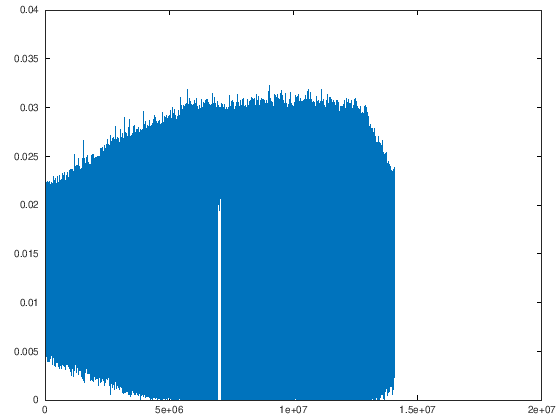

In [6]:
plot(abs(z));

In [7]:
size(z)

ans =

   14062500          1



In [8]:
sampleRate = fs;
numPeriods = rows(z)/sampleRate;
period = numPeriods;
Tshort = 0:1/sampleRate:1;
T = 0:1/sampleRate:period;

In [9]:
RC = (1 - cos(2*pi*Tshort))/2;

In [10]:
Sig = z(1:columns(RC))' .* RC;

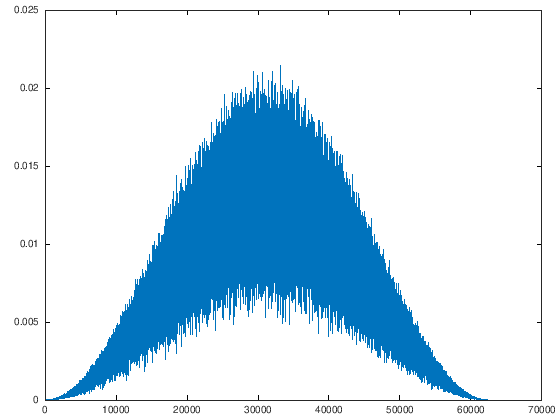

In [11]:
plot(abs(Sig));

In [12]:
E_cos_pulse = abs(fftshift(fft(Sig, sampleRate*10 + 1)));
F_base = linspace(-sampleRate/2, sampleRate/2, columns(E_cos_pulse));

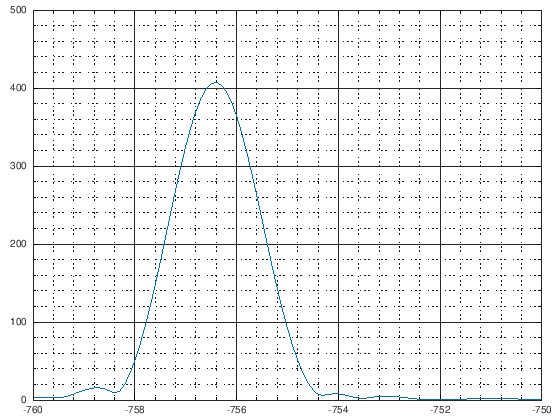

In [17]:
plot(F_base, E_cos_pulse)
grid on
grid minor
axis([-760 -750], "tic")

In [18]:
F_base(find(E_cos_pulse(:) == max(E_cos_pulse)))

ans = -756.40


In [19]:
find(E_cos_pulse(:) == max(E_cos_pulse))

ans =  304937


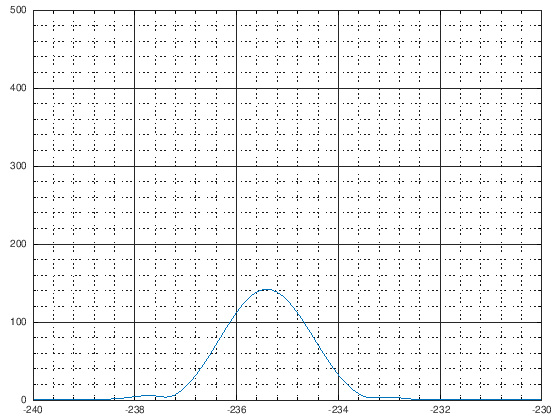

In [23]:
plot(F_base, E_cos_pulse)
grid on
grid minor
axis([-240 -230], "tic")

In [24]:
find(F_base(:) == -240)

ans =  310101


In [25]:
find(F_base(:) == -232)

ans =  310181


In [28]:
F_base(find(E_cos_pulse(:) == max(E_cos_pulse(310101:310181))))

ans = -235.40


In [30]:
F_base(find(E_cos_pulse(:) == max(E_cos_pulse(310101:310181)))) - ...
F_base(find(E_cos_pulse(:) == max(E_cos_pulse)))

ans =  521


In [31]:
721 - 521

ans =  200


In [33]:
fracSeconds = 1;
indexIncr = (columns(Tshort)-1)/fracSeconds;
Freqs = [];
for startIndex = 1:indexIncr:rows(z)-columns(RC)-1
  Sig = z(startIndex:startIndex+columns(RC)-1)' .* RC;
  E_cos_pulse = abs(fftshift(fft(Sig, sampleRate*10 + 1)));
  F_base = linspace(-sampleRate/2, sampleRate/2, columns(E_cos_pulse));
  freq = F_base(find(E_cos_pulse(:) == max(E_cos_pulse)))
  time = T(startIndex)
endfor

freq = -756.40
time = 0
freq = -756
time =  1
freq = -755.60
time =  2
freq = -755.20
time =  3
freq = -754.70
time =  4
freq = -754.30
time =  5
freq = -753.90
time =  6
freq = -753.50
time =  7
freq = -753
time =  8
freq = -752.60
time =  9
freq = -752.10
time =  10
freq = -751.80
time =  11
freq = -751.20
time =  12
freq = -750.80
time =  13
freq = -750.40
time =  14
freq = -750
time =  15
freq = -749.60
time =  16
freq = -749.10
time =  17
freq = -748.60
time =  18
freq = -748.20
time =  19
freq = -747.80
time =  20
freq = -747.30
time =  21
freq = -746.80
time =  22
freq = -746.40
time =  23
freq = -745.90
time =  24
freq = -745.40
time =  25
freq = -745
time =  26
freq = -744.60
time =  27
freq = -744.10
time =  28
freq = -743.70
time =  29
freq = -743.20
time =  30
freq = -742.80
time =  31
freq = -742.30
time =  32
freq = -741.80
time =  33
freq = -741.30
time =  34
freq = -740.80
time =  35
freq = -740.40
time =  36
freq = -740
time =  37
freq = -739.50
time =  38
freq = -739.